In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorboard as tb

In [2]:
experiment_id = "fL8jM1JXTbC5SnpQ90JWlQ"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

,run,tag,step,value
0,DNABERT,auprc_DHS_Ath_flower_14_days,27080,0.634451
1,DNABERT,auprc_DHS_Ath_inflorescence_normal,27080,0.440137
2,DNABERT,auprc_DHS_Ath_leaf_normal,27080,0.465153
3,DNABERT,auprc_DHS_Ath_open_flower_normal,27080,0.505751
4,DNABERT,auprc_DHS_Ath_root_7_days,27080,0.574621
...,...,...,...,...
8463,version_5,val_neg_median_auroc,20069,-0.928403
8464,version_5,val_neg_median_auroc,23414,-0.927481
8465,version_5,val_neg_median_auroc,26759,-0.928805
8466,version_5,val_neg_median_auroc,30104,-0.928532


In [3]:
df.run.replace({"version_5": "PlantBert"}, inplace=True)
df = df[df.run.isin(["DeepSEA", "PlantBert"])]
df

,run,tag,step,value
1390,DeepSEA,auprc_DHS_Ath_flower_14_days,86632,0.614921
1391,DeepSEA,auprc_DHS_Ath_inflorescence_normal,86632,0.439895
1392,DeepSEA,auprc_DHS_Ath_leaf_normal,86632,0.444190
1393,DeepSEA,auprc_DHS_Ath_open_flower_normal,86632,0.484843
1394,DeepSEA,auprc_DHS_Ath_root_7_days,86632,0.555127
...,...,...,...,...
8463,PlantBert,val_neg_median_auroc,20069,-0.928403
8464,PlantBert,val_neg_median_auroc,23414,-0.927481
8465,PlantBert,val_neg_median_auroc,26759,-0.928805
8466,PlantBert,val_neg_median_auroc,30104,-0.928532


In [6]:
df = df[df.tag.str.startswith("auprc")]
df

,run,tag,step,value
1390,DeepSEA,auprc_DHS_Ath_flower_14_days,86632,0.614921
1391,DeepSEA,auprc_DHS_Ath_inflorescence_normal,86632,0.439895
1392,DeepSEA,auprc_DHS_Ath_leaf_normal,86632,0.444190
1393,DeepSEA,auprc_DHS_Ath_open_flower_normal,86632,0.484843
1394,DeepSEA,auprc_DHS_Ath_root_7_days,86632,0.555127
...,...,...,...,...
6907,PlantBert,auprc_TFBS_AT5G63790_Ath_seedling_normal,33450,0.262692
6908,PlantBert,auprc_TFBS_AT5G65310_Ath_seedling_ABA_treatmen...,33450,0.670793
6909,PlantBert,auprc_TFBS_AT5G65310_Ath_seedling_normal,33450,0.672918
6910,PlantBert,auprc_TFBS_AT5G67300_Ath_seedling_ABA_treatmen...,33450,0.698629


In [8]:
df = df.pivot(index='tag', columns='run', values='value')

In [12]:
df["Feature class"] = df.index.str.split("_").str[1]
df

run,DeepSEA,PlantBert,Feature class
tag,,,
auprc_DHS_Ath_flower_14_days,0.614921,0.677004,DHS
auprc_DHS_Ath_inflorescence_normal,0.439895,0.492293,DHS
auprc_DHS_Ath_leaf_normal,0.444190,0.504962,DHS
auprc_DHS_Ath_open_flower_normal,0.484843,0.548213,DHS
auprc_DHS_Ath_root_7_days,0.555127,0.609742,DHS
...,...,...,...
auprc_TFBS_AT5G63790_Ath_seedling_normal,0.212799,0.262692,TFBS
auprc_TFBS_AT5G65310_Ath_seedling_ABA_treatment_for_4h,0.606286,0.670793,TFBS
auprc_TFBS_AT5G65310_Ath_seedling_normal,0.610986,0.672918,TFBS


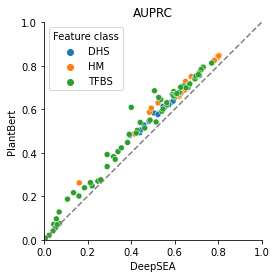

In [34]:
sns.scatterplot(data=df, x="DeepSEA", y="PlantBert", hue="Feature class",)
plt.xlim([0, 1])
plt.ylim([0, 1])
sns.despine()
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("AUPRC")
plt.gca().set_aspect('equal', 'box')
plt.savefig("auprc.pdf", bbox_inches='tight')
#plt.axis("equal")